In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import pydotplus
from IPython.display import Image  

from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd 

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("spambase/spambase.data", header=None, na_filter=False) 

In [3]:
data

0     1     2    3     4     5     6     7     8     9   ...     48  \
0     0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.000   
1     0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.000   
2     0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.010   
3     0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
4     0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
...    ...   ...   ...  ...   ...   ...   ...   ...   ...   ...  ...    ...   
4596  0.31  0.00  0.62  0.0  0.00  0.31  0.00  0.00  0.00  0.00  ...  0.000   
4597  0.00  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4598  0.30  0.00  0.30  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.102   
4599  0.96  0.00  0.00  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4600  0.00  0.00  0.65  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   

         49   50     51     52     53     54   55    56  57  
0     0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1     0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2     0.143  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3     0.137  0.0  0.137  0.000  0.000  3.537   40   191   1  
4     0.135  0.0  0.135  0.000  0.000  3.537   40   191   1  
...     ...  ...    ...    ...    ...    ...  ...   ...  ..  
4596  0.232  0.0  0.000  0.000  0.000  1.142    3    88   0  
4597  0.000  0.0  0.353  0.000  0.000  1.555    4    14   0  
4598  0.718  0.0  0.000  0.000  0.000  1.404    6   118   0  
4599  0.057  0.0  0.000  0.000  0.000  1.147    5    78   0  
4600  0.000  0.0  0.125  0.000  0.000  1.250    5    40   0  

[4601 rows x 58 columns]

In [4]:
print(data.isnull().sum().sum())
#print(data.isnull().sum())
print("number of spam = ", np.count_nonzero(data[data.columns[57:58]]))
print("number of not spam = ", 4601 - np.count_nonzero(data[data.columns[57:58]]))


0
number of spam =  1813
number of not spam =  2788


In [5]:
X = data[data.columns[:-1]]
y = data[data.columns[57:58]]

X
y
print(y.shape)
print(X.shape)
np.count_nonzero(y)

(4601, 1)
(4601, 57)


1813

In [6]:
clf = DecisionTreeClassifier()
clf = clf.fit(X,y)

[Text(298.798,221.234,'X[52] <= 0.056\ngini = 0.478\nsamples = 4601\nvalue = [2788, 1813]'),
 Text(265.373,214.821,'X[6] <= 0.055\ngini = 0.36\nsamples = 3471\nvalue = [2655, 816]'),
 Text(224.939,208.409,'X[51] <= 0.378\ngini = 0.275\nsamples = 3141\nvalue = [2625, 516]'),
 Text(188.341,201.996,'X[15] <= 0.2\ngini = 0.181\nsamples = 2737\nvalue = [2462, 275]'),
 Text(159.584,195.583,'X[23] <= 0.01\ngini = 0.135\nsamples = 2507\nvalue = [2325, 182]'),
 Text(145.21,189.171,'X[21] <= 0.155\ngini = 0.111\nsamples = 2439\nvalue = [2295, 144]'),
 Text(132.629,182.758,'X[55] <= 416.0\ngini = 0.101\nsamples = 2404\nvalue = [2276, 128]'),
 Text(131.089,176.346,'X[4] <= 0.715\ngini = 0.097\nsamples = 2399\nvalue = [2276, 123]'),
 Text(112.086,169.933,'X[3] <= 0.565\ngini = 0.079\nsamples = 2199\nvalue = [2109, 90]'),
 Text(110.547,163.521,'X[27] <= 7.105\ngini = 0.077\nsamples = 2197\nvalue = [2109, 88]'),
 Text(109.007,157.108,'X[24] <= 0.015\ngini = 0.075\nsamples = 2195\nvalue = [2109, 86]')

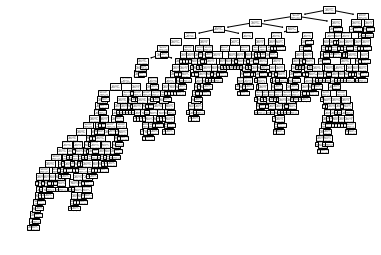

In [7]:
tree.plot_tree(clf) 

In [8]:
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True,
                special_characters=True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

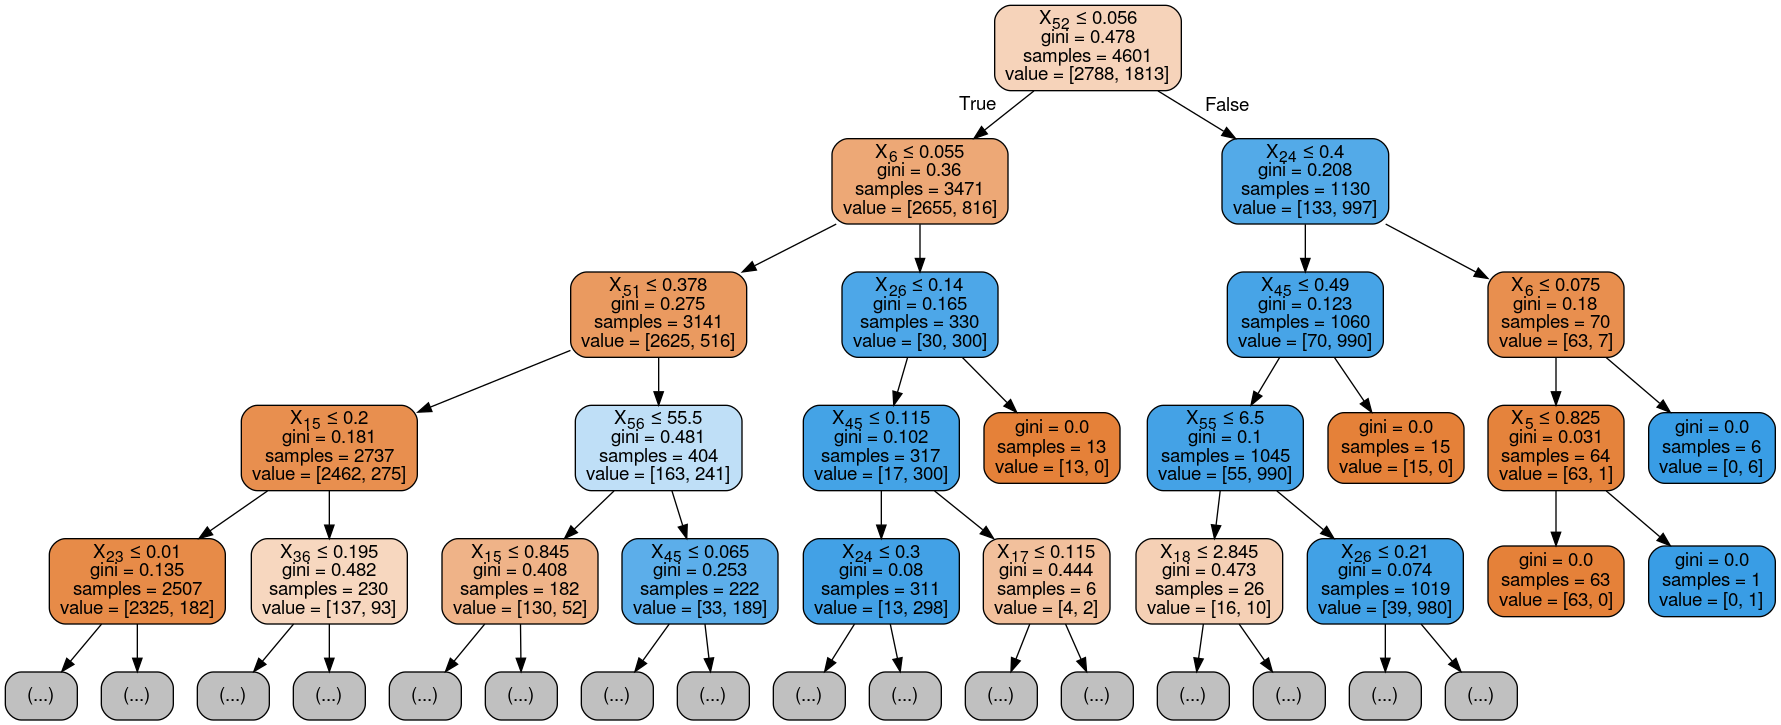

In [9]:
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True,
                special_characters=True, max_depth=4)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [10]:
clf = RandomForestClassifier()
clf = clf.fit(X,y)

/home/hadi/anaconda3/envs/StatisticalLearning/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [11]:
print(clf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [13]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

y_p_dt = clf.predict(X_test)

# calculate scores
auc = roc_auc_score(y_test, y_p_dt)
# summarize scores
print('Decision Tree Classifier: ROC AUC=%.3f' % (auc))
print('Depth of the tree:', clf.get_depth())

Decision Tree Classifier: ROC AUC=0.907
Depth of the tree: 26


In [14]:
clf = RandomForestClassifier()
clf = clf.fit(X_train,y_train)

y_p_rf = clf.predict(X_test)

# calculate scores
auc = roc_auc_score(y_test, y_p_rf)
# summarize scores
print('Random Forest Classifier: ROC AUC=%.3f' % (auc))


/home/hadi/anaconda3/envs/StatisticalLearning/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Classifier: ROC AUC=0.952


In [25]:
aucs_dtc = []
aucs_rfc = []

for i in range(1,50): 
    dtc = DecisionTreeClassifier(max_depth=i)
    rfc = RandomForestClassifier(max_depth=i)
    dtc.fit(X_train,y_train)
    rfc.fit(X_train,y_train)
    
    # calculate scores for Decision Tree
    y_p_rf = dtc.predict(X_test)
    auc = roc_auc_score(y_test, y_p_rf)
    aucs_dtc.append(auc)
    
    # calculate scores for Random Forest Tree
    y_p_rf = rfc.predict(X_test)
    auc = roc_auc_score(y_test, y_p_rf)
    aucs_rfc.append(auc)
    
    
    

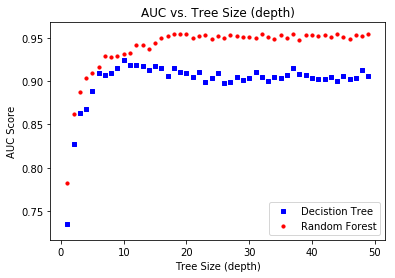

In [27]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

plt.title('AUC vs. Tree Size (depth)')
plt.xlabel('Tree Size (depth)')
plt.ylabel('AUC Score')

ax1.scatter(range(1,50), aucs_dtc, s=10, c='b', marker="s", label='Decistion Tree')
ax1.scatter(range(1,50),aucs_rfc, s=10, c='r', marker="o", label='Random Forest')
plt.legend(loc='lower right');
plt.show()

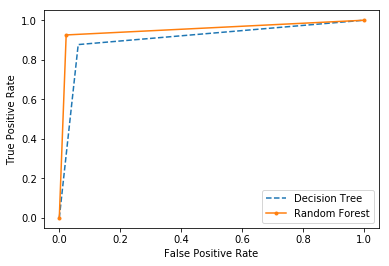

In [15]:
# calculate roc curves
dt_fpr, dt_tpr, _ = roc_curve(y_test, y_p_dt)
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_p_rf)
# plot the roc curve for the model
plt.plot(dt_fpr, dt_tpr, linestyle='--', label='Decision Tree')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()